# Assignment 4: Airline arrivals project

# TABLE OF CONTENTS

# I. Introduction

# II. Contents:

## 1. Preparing and exploring the data

### 1.1 Import librabries and handle missing value

1.1.1 Check out some basic information of data

1.1.2 Check missing value

### 1.2 Exploratory Data Analysis (EDA) 

1.2.1 Handle high correlatied feature

1.2.2 Handle outlier and visualize correlation of categorical feature

## 2. Hypothesis testing

## I. Introduction:

Use this dataset of airline arrival information to predict how late flights will be.
Apply studied methods to training model.

There is 29 features in file 2008.csv

1   Year                2008

2   Month               1-4

3   DayofMonth          1-31

4   DayOfWeek           1 (Monday) - 7 (Sunday)

5   DepTime             actual departure time (local, hhmm)

6   CRSDepTime          scheduled departure time (local, hhmm)

7   ArrTime             actual arrival time (local, hhmm)

8   CRSArrTime          scheduled arrival time (local, hhmm)

9   UniqueCarrier       unique carrier code

10  FlightNum           flight number

11  TailNum             plane tail number

12  ActualElapsedTime  actual elapsed time

13  CRSElapsedTime      scheduled laosed time

14  AirTime             in minutes

15  ArrDelay            arrival delay, in minutes

16  DepDelay            departure delay, in minutes

17  Origin              origin IATA airport code

18  Dest                destination IATA airport code

19  Distance            in miles

20  TaxiIn              taxi in time, in minutes

21  TaxiOut             taxi out time in minutes

22  Cancelled           was the flight cancelled?

23  CancellationCode    reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

24  Diverted            1 = yes, 0 = no

25  CarrierDelay        in minutes

26  WeatherDelay        in minutes

27  NASDelay            in minutes

28  SecurityDelay       in minutes

29  LateAircraftDelay   in minutes

There is 9 features in file plan-data.csv:

1 TailNum

2 type

3 manufacturer

4 issue_date

5 model

6 status

7 aircraft_type

8 engine_type

9 year

## II. Contents:

## 1. Preparing and exploring the data

### 1.1 Import librabries and handle missing value

Add necessary library. Read file '2008.csv' and file 'plan-data.csv'. We are merge two file 

In [112]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

In [3]:
num_lines = 7009728  #number of records in file
sample_lines = 1000000 #desired sample size

random.seed(9001)
skip = random.sample(range(1, num_lines), num_lines - sample_lines)

In [4]:
data2008 = pd.read_csv('2008.csv', skiprows=skip)
plan = pd.read_csv('plane-data.csv')
original = pd.merge(data2008, plan)

#### 1.1.1 Check out some basic information of data

In [5]:
original.shape

(322539, 37)

In [6]:
original.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,NaN,NaN,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
1,2008,1,3,4,1720.0,1710,1944.0,1955,WN,3841,...,NaN,NaN,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
2,2008,1,3,4,1021.0,1025,1106.0,1115,WN,3754,...,NaN,NaN,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
3,2008,1,5,6,727.0,730,910.0,905,WN,912,...,NaN,NaN,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
4,2008,1,5,6,2131.0,2020,2334.0,2240,WN,444,...,0.0,54.0,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007


In [7]:
original.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

After merge two file 2008.csv and plan-data.csv, the us data have 322539 observations and 37 features

In [8]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322539 entries, 0 to 322538
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               322539 non-null  int64  
 1   Month              322539 non-null  int64  
 2   DayofMonth         322539 non-null  int64  
 3   DayOfWeek          322539 non-null  int64  
 4   DepTime            319368 non-null  float64
 5   CRSDepTime         322539 non-null  int64  
 6   ArrTime            318610 non-null  float64
 7   CRSArrTime         322539 non-null  int64  
 8   UniqueCarrier      322539 non-null  object 
 9   FlightNum          322539 non-null  int64  
 10  TailNum            322539 non-null  object 
 11  ActualElapsedTime  318610 non-null  float64
 12  CRSElapsedTime     322539 non-null  float64
 13  AirTime            318610 non-null  float64
 14  ArrDelay           318610 non-null  float64
 15  DepDelay           319368 non-null  float64
 16  Or

There are 14 features type float, 10 features type int, 13 features type object

#### 1.1.2 Check missing value

In [9]:
types = original.dtypes.to_frame().rename(columns={0:'dtypes'})
null = original.isnull().sum().to_frame().rename(columns={0:'missing values'})
null_percent = (original.isnull().sum()/original.shape[0]*100).to_frame().rename(columns={0:'% missing values'})
df_missing = pd.concat([types, null, null_percent], axis=1)
df_missing

,dtypes,missing values,% missing values
Year,int64,0,0.000000
Month,int64,0,0.000000
DayofMonth,int64,0,0.000000
DayOfWeek,int64,0,0.000000
DepTime,float64,3171,0.983137
CRSDepTime,int64,0,0.000000
ArrTime,float64,3929,1.218147
CRSArrTime,int64,0,0.000000
UniqueCarrier,object,0,0.000000
FlightNum,int64,0,0.000000


There are 6 feature missing sample bigger than 60 percent.

In [10]:
missing_big = df_missing[df_missing['% missing values'] > 60]
missing_big

,dtypes,missing values,% missing values
CancellationCode,object,319368,99.016863
CarrierDelay,float64,242202,75.092314
WeatherDelay,float64,242202,75.092314
NASDelay,float64,242202,75.092314
SecurityDelay,float64,242202,75.092314
LateAircraftDelay,float64,242202,75.092314


 Remove this features 'CancellationCode','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'

In [11]:
original.drop(columns = missing_big.index, inplace = True)
original = original.drop_duplicates()

In [12]:
missing = (original.isnull().sum()/original.shape[0]*100).to_frame().rename(columns={0:'% missing values'})
types = original.dtypes.to_frame().rename(columns={0:'dtypes'})
pd.concat([missing, types], axis = 1)

,% missing values,dtypes
Year,0.000000,int64
Month,0.000000,int64
DayofMonth,0.000000,int64
DayOfWeek,0.000000,int64
DepTime,0.983140,float64
CRSDepTime,0.000000,int64
ArrTime,1.218151,float64
CRSArrTime,0.000000,int64
UniqueCarrier,0.000000,object
FlightNum,0.000000,int64


In [13]:
original.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,322538.0,322538.000000,322538.000000,322538.000000,319367.000000,322538.000000,318609.000000,322538.000000,322538.000000,318609.000000,322538.000000,318609.000000,318609.000000,319367.000000,322538.000000,318609.000000,319367.000000,322538.000000,322538.000000
mean,2008.0,2.507329,15.706032,3.919513,1338.660644,1328.224243,1484.727707,1494.655910,2117.957593,129.913085,130.758072,106.544489,10.225756,11.346081,739.572587,6.773873,16.601102,0.009831,0.002350
std,0.0,1.123459,8.747380,1.983025,481.381190,467.148574,509.428185,486.403956,1912.838805,71.107450,70.509304,68.423525,38.943640,35.785017,564.602497,4.750742,10.983372,0.098665,0.048421
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,-90.000000,-79.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000,8.000000,2.000000,929.000000,925.000000,1108.000000,1115.000000,577.000000,78.000000,80.000000,57.000000,-9.000000,-4.000000,328.000000,4.000000,10.000000,0.000000,0.000000
50%,2008.0,3.000000,16.000000,4.000000,1329.000000,1320.000000,1515.000000,1517.000000,1476.000000,112.000000,113.000000,88.000000,0.000000,0.000000,590.000000,6.000000,14.000000,0.000000,0.000000
75%,2008.0,4.000000,23.000000,6.000000,1734.000000,1720.000000,1914.000000,1910.000000,3351.000000,162.000000,162.000000,137.000000,15.000000,11.000000,983.000000,8.000000,19.000000,0.000000,0.000000
max,2008.0,4.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,7829.000000,686.000000,660.000000,658.000000,1211.000000,1198.000000,4962.000000,175.000000,379.000000,1.000000,1.000000


In [14]:
original['ArrDelay'].fillna(original['ArrDelay'].mean(), inplace = True)
original['TaxiOut'].fillna(original['TaxiOut'].mean(), inplace = True)
original['TaxiIn'].fillna(original['TaxiIn'].mean(), inplace = True)
original['DepDelay'].fillna(original['DepDelay'].mean(), inplace = True)
original['ArrDelay'].fillna(original['ArrDelay'].mean(), inplace = True)
original['AirTime'].fillna(original['AirTime'].mean(), inplace = True)
original['CRSElapsedTime'].fillna(original['CRSElapsedTime'].mean(),inplace = True)
original['ActualElapsedTime'].fillna(original['ActualElapsedTime'].mean(), inplace = True)

DataNew = original.dropna()

Based on the describe, replace missing value by mean value of corresponding feature. Drop missing value of data which belongs to the type object.

The DataNew is not missing value

In [15]:
DataNew.nunique()

Year                    1
Month                   4
DayofMonth             31
DayOfWeek               7
DepTime              1355
CRSDepTime           1134
ArrTime              1433
CRSArrTime           1295
UniqueCarrier          19
FlightNum            7105
TailNum              4427
ActualElapsedTime     589
CRSElapsedTime        446
AirTime               570
ArrDelay              572
DepDelay              525
Origin                281
Dest                  281
Distance             1295
TaxiIn                101
TaxiOut               198
Cancelled               1
Diverted                1
type                    5
manufacturer           37
issue_date           2387
model                 164
status                  2
aircraft_type           4
engine_type             7
year                   51
dtype: int64

The features 'Year', 'Cancelled', 'Diverted' is only 1 unique value, which will be little affect for training.
The features 'FlightNum' 'TailNum' 'issue_date' is many value unique, which will be little affect fot training. 

In [16]:
DataNew = DataNew.drop(columns = ['Year', 'Cancelled', 'Diverted', 'FlightNum', 'TailNum', 'issue_date'])
DataNew = DataNew.drop_duplicates()

In [17]:
DataNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303230 entries, 0 to 322538
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month              303230 non-null  int64  
 1   DayofMonth         303230 non-null  int64  
 2   DayOfWeek          303230 non-null  int64  
 3   DepTime            303230 non-null  float64
 4   CRSDepTime         303230 non-null  int64  
 5   ArrTime            303230 non-null  float64
 6   CRSArrTime         303230 non-null  int64  
 7   UniqueCarrier      303230 non-null  object 
 8   ActualElapsedTime  303230 non-null  float64
 9   CRSElapsedTime     303230 non-null  float64
 10  AirTime            303230 non-null  float64
 11  ArrDelay           303230 non-null  float64
 12  DepDelay           303230 non-null  float64
 13  Origin             303230 non-null  object 
 14  Dest               303230 non-null  object 
 15  Distance           303230 non-null  int64  
 16  Ta

### Variable analysis

#### Object variable

In [18]:
DataNew.describe(include = 'O')

,UniqueCarrier,Origin,Dest,type,manufacturer,model,status,aircraft_type,engine_type,year
count,303230,303230,303230,303230,303230,303230,303230,303230,303230,303230
unique,19,281,281,5,37,164,2,4,7,51
top,WN,ATL,ATL,Corporation,BOEING,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
freq,56103,18408,18537,301282,128692,34615,303213,301507,205182,26902


<AxesSubplot:xlabel='UniqueCarrier', ylabel='Count'>

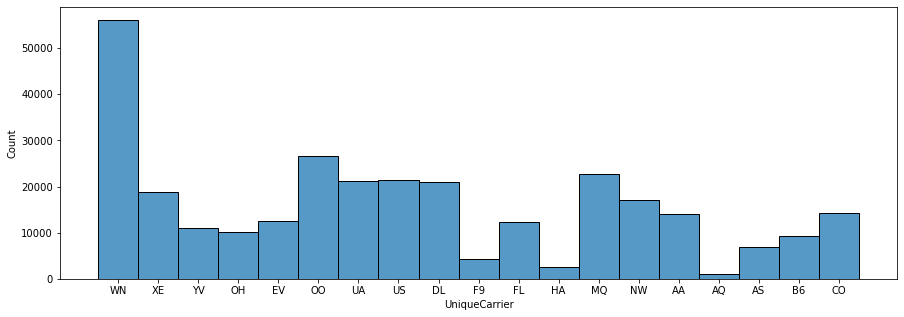

In [19]:
f = plt.figure(figsize = (15,5))
sns.histplot(DataNew['UniqueCarrier'])

<AxesSubplot:xlabel='type', ylabel='Count'>

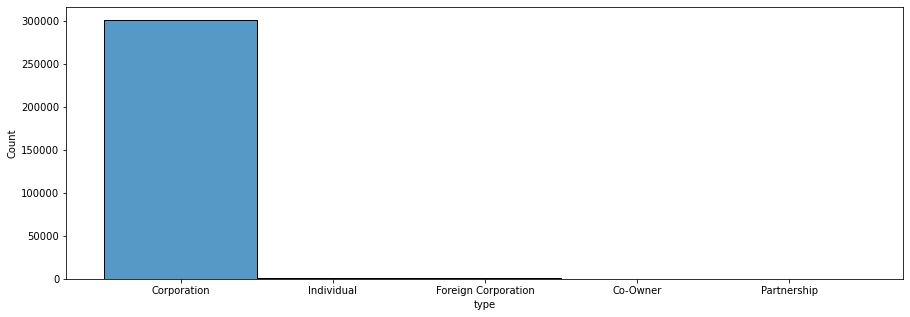

In [20]:
f = plt.figure(figsize = (15,5))
sns.histplot(DataNew['type'])

Based on the graph, The feature 'type' is need to remove

<AxesSubplot:xlabel='status', ylabel='Count'>

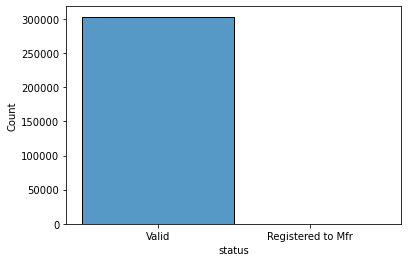

In [21]:
sns.histplot(data = DataNew['status'])

Based on the graph, The feature 'status' is need to remove

<AxesSubplot:xlabel='aircraft_type', ylabel='Count'>

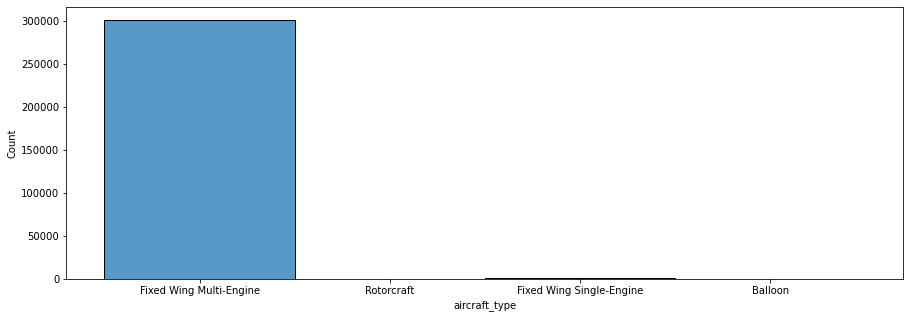

In [22]:
f = plt.figure(figsize = (15,5))
sns.histplot(data = DataNew['aircraft_type'])

Based on the graph, The feature 'aircraft_type' is need to remove

<AxesSubplot:xlabel='engine_type', ylabel='Count'>

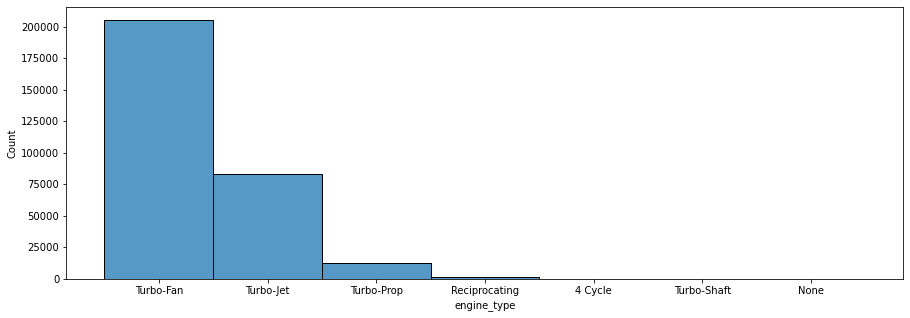

In [23]:
f = plt.figure(figsize = (15,5))
sns.histplot(DataNew['engine_type'])

Based on the graph, The feature 'engine_type' is need to remove

<AxesSubplot:xlabel='Year', ylabel='Count'>

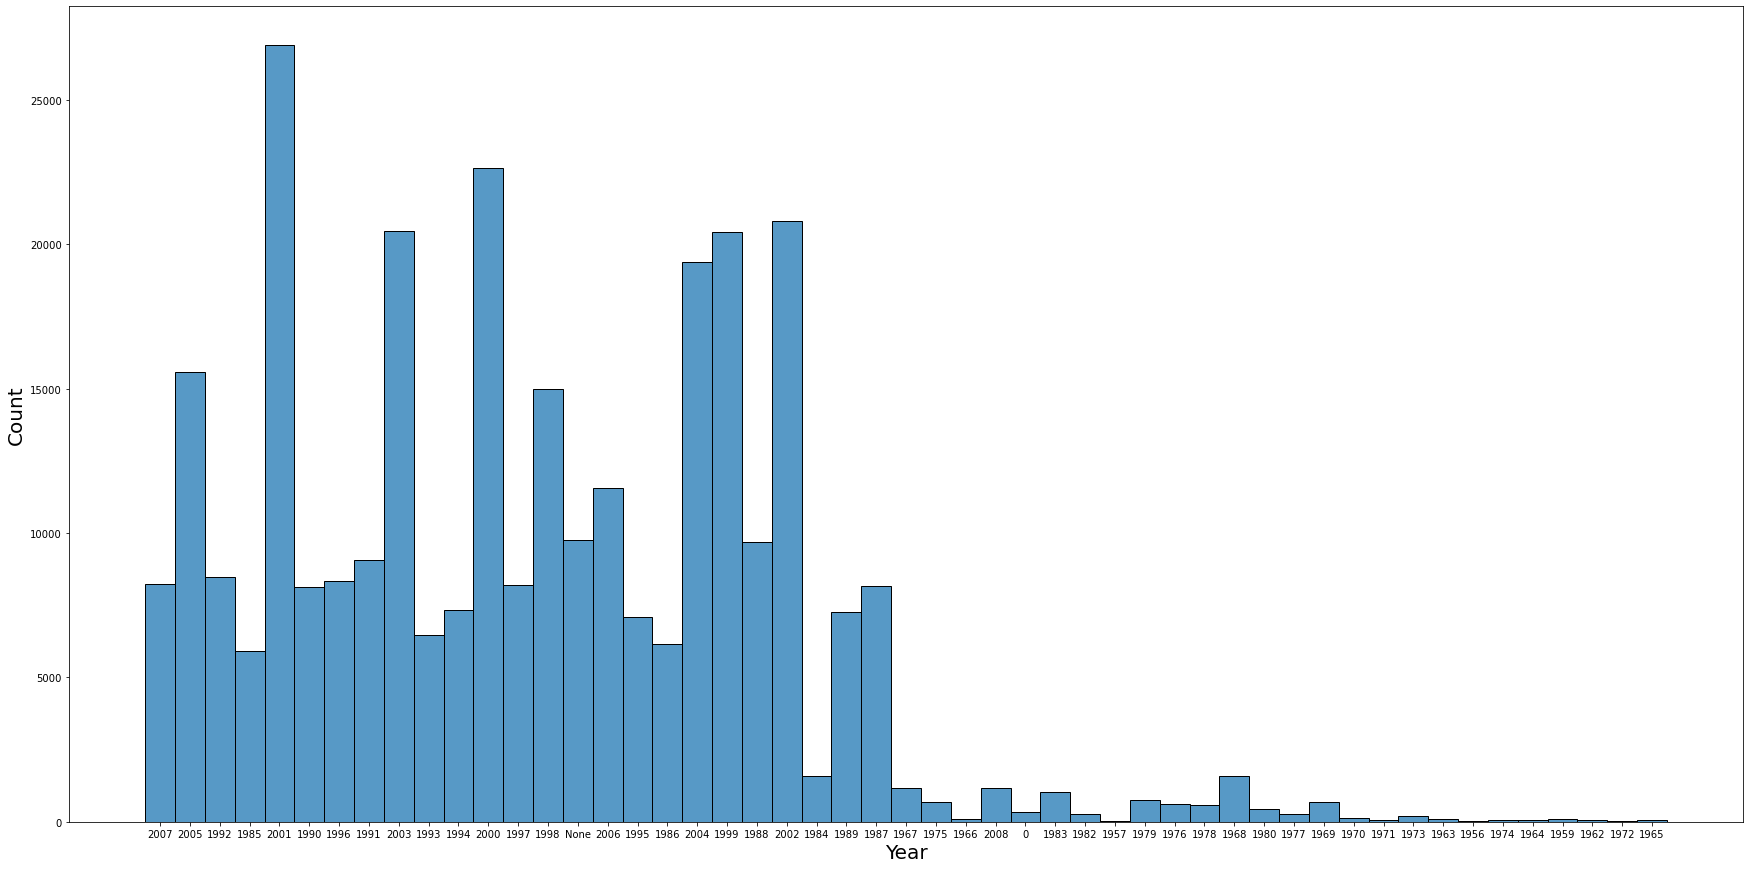

In [24]:
f = plt.figure(figsize = (30,15))
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
sns.histplot(data = DataNew.year)

The feature 'year' can be used in training

<AxesSubplot:xlabel='manufacturer', ylabel='Count'>

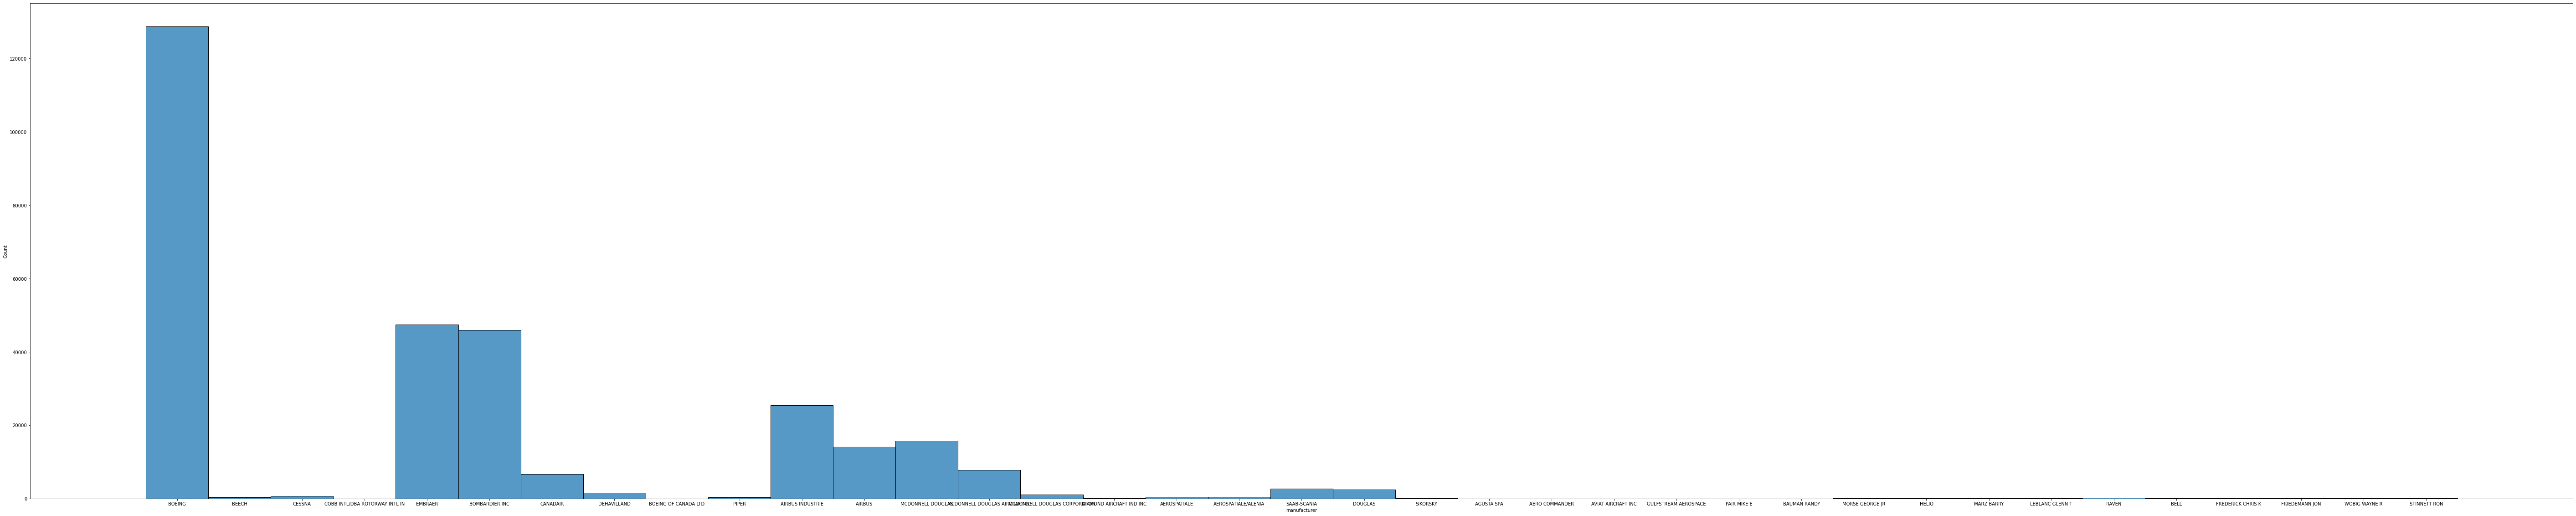

In [25]:
f = plt.figure(figsize = (100,20))
sns.histplot(data = DataNew['manufacturer'])

The feature 'manufacturer' can be used in training

In [26]:
DataNew.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000,303230.000000
mean,2.514062,15.718244,3.916562,1338.774505,1328.131029,1483.756277,1492.846367,127.817838,128.965759,104.552739,9.933621,11.081559,724.587580,6.712486,16.552614
std,1.124061,8.744452,1.982571,480.701120,466.692847,507.927012,485.700709,70.357852,69.968017,67.692362,38.521082,35.243483,559.104692,4.663170,10.953706
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,19.000000,0.000000,-90.000000,-79.000000,31.000000,0.000000,0.000000
25%,1.000000,8.000000,2.000000,929.000000,925.000000,1107.000000,1112.000000,77.000000,79.000000,56.000000,-9.000000,-4.000000,325.000000,4.000000,10.000000
50%,3.000000,16.000000,4.000000,1329.000000,1320.000000,1514.000000,1515.000000,110.000000,110.000000,86.000000,0.000000,0.000000,581.000000,6.000000,14.000000
75%,4.000000,23.000000,6.000000,1734.000000,1720.000000,1913.000000,1909.000000,158.000000,160.000000,133.000000,14.000000,10.000000,954.000000,8.000000,19.000000
max,4.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,686.000000,660.000000,658.000000,1211.000000,1198.000000,4962.000000,175.000000,379.000000


<AxesSubplot:xlabel='DepTime', ylabel='Count'>

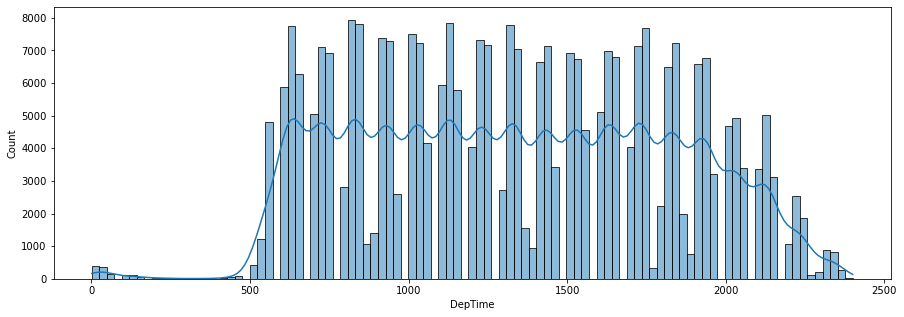

In [27]:
f = plt.figure(figsize = (15,5))
sns.histplot(data = DataNew['DepTime'],kde = True)

The flights is little from 0am to 5am. 

<AxesSubplot:xlabel='ActualElapsedTime', ylabel='Count'>

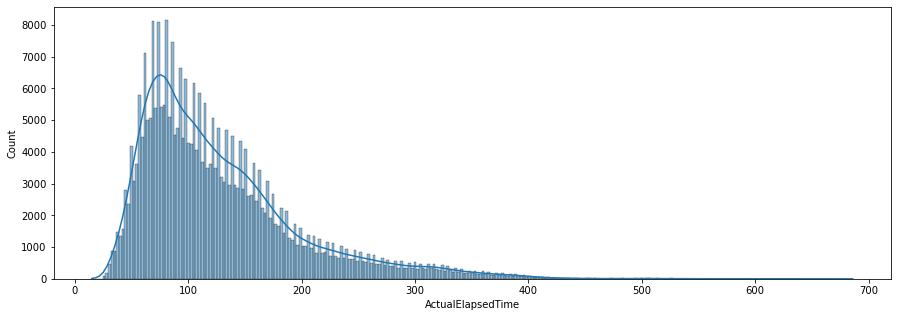

In [28]:
f = plt.figure(figsize = (15,5))
sns.histplot(data = DataNew['ActualElapsedTime'], kde = True)

<AxesSubplot:xlabel='ArrTime', ylabel='Count'>

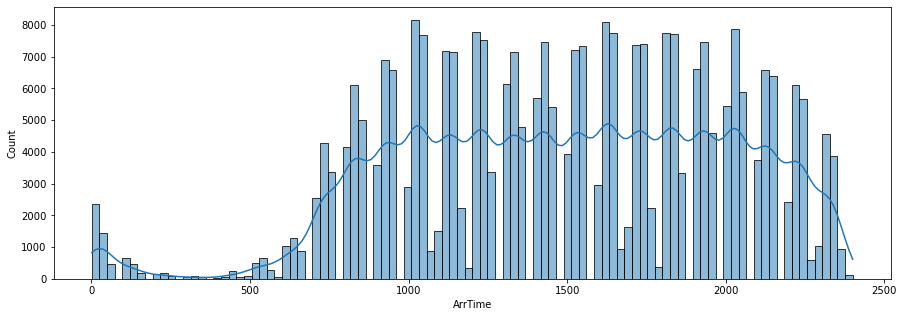

In [29]:
f = plt.figure(figsize = (15,5))
sns.histplot(data = DataNew['ArrTime'],kde = True)

<AxesSubplot:xlabel='Distance', ylabel='Count'>

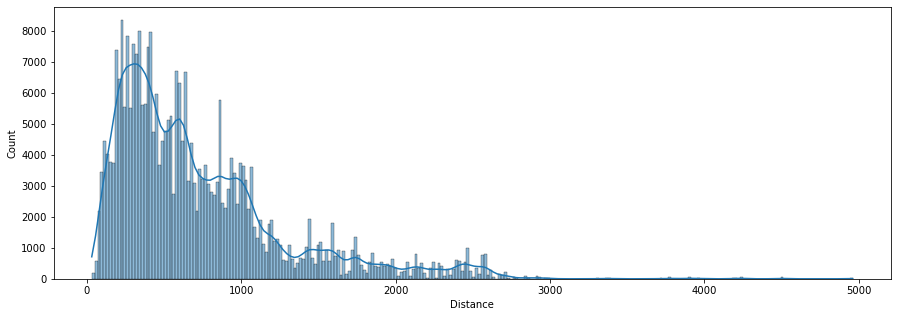

In [30]:
f = plt.figure(figsize = (15,5))
sns.histplot(data = DataNew['Distance'], kde = True)

The 'Distance' is mainly less than 1000 mile

In [31]:
df1 = DataNew.drop(columns = [ 'DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'status'])

### Detecting outliers

#### Distance

In [32]:
q1,q3 = df1['Distance'].quantile(0.25), df1['Distance'].quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print('Number of outliers: {}'.format( df1[ (df1['Distance']< lower) | (df1['Distance'] > upper) ].shape[0]) )
print('{}%'.format( round( df1[ (df1['Distance']< lower) | (df1['Distance'] > upper) ].shape[0] )/ (df1.shape[0]) * 100 ))

Number of outliers: 16106
5.311479734854731%


In [33]:
df1 = df1[ (df1['Distance'] > lower) & (df1['Distance'] < upper)]

In [34]:
df1.shape

(287124, 17)

### Multivariable analysis:

<AxesSubplot:xlabel='ArrDelay', ylabel='Count'>

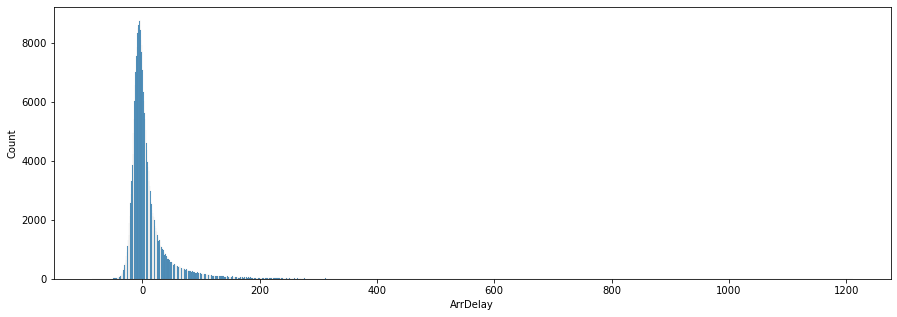

In [35]:
f = plt.figure(figsize = (15,5))
sns.histplot(data = df1['ArrDelay'])

The ArrDelay value is flow the normal distribution. The flights delay focus at from 11pm to 1am.

In [36]:
df1['is_delay'] = df1.ArrDelay.apply(lambda x: 1 if x > 30 else 0)
df1.drop(columns = ['ArrDelay'], inplace = True)

In [37]:
df1['is_delay'].value_counts()

0    245173
1     41951
Name: is_delay, dtype: int64

D:\Software\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_delay', ylabel='count'>

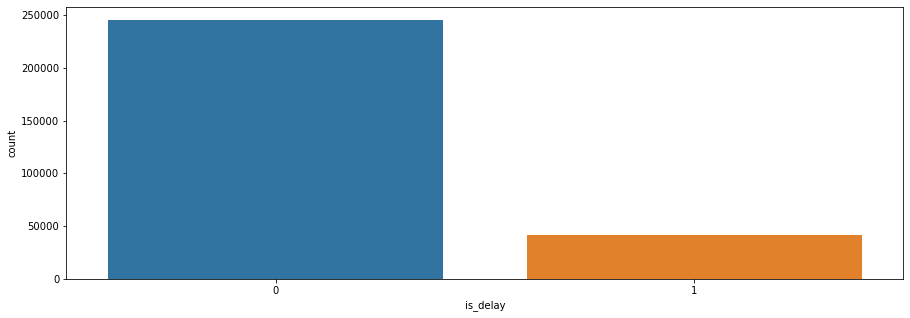

In [38]:
f = plt.figure(figsize = (15,5))
sns.countplot(df1.is_delay)

The feature is_delay is imbalance 

#### Month

In [39]:
monthDelay = df1[['Month', 'is_delay']].groupby('Month').agg(['count', 'sum']).droplevel(axis = 1, level = 0).reset_index().rename(columns = {'sum': 'Sum', 'count': 'Count'})
monthDelay['late ratio'] = monthDelay['Sum']/monthDelay['Count']

<function matplotlib.pyplot.show(close=None, block=None)>

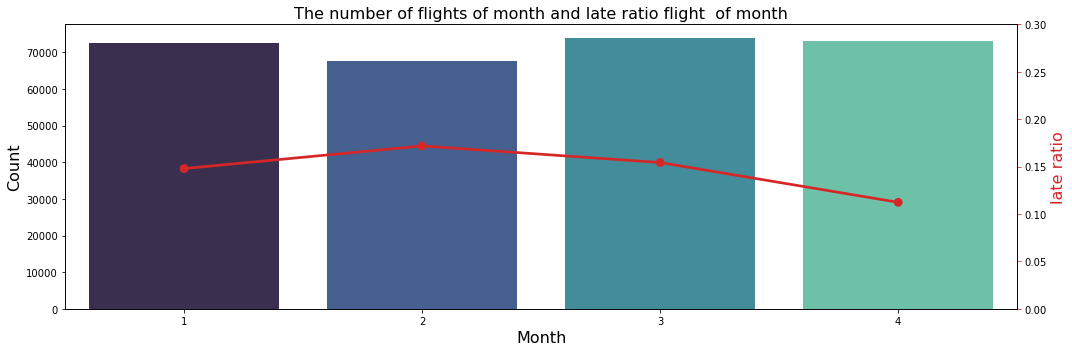

In [40]:
f, ax1 = plt.subplots(figsize = (15,5))
ax1.set_title('The number of flights of month and late ratio flight  of month', fontsize = 16)
ax1.set_xlabel('Month', fontsize = 16)
ax1.set_ylabel('Count', fontsize = 16)
ax1 = sns.barplot(x = 'Month', y = 'Count',data = monthDelay, palette = 'mako')
ax1.tick_params(axis = 'y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Late ratio', fontsize = 16, color = color)
ax2 = sns.pointplot(x = 'Month', y = 'late ratio', data = monthDelay, color = color)
ax2.set(ylim =(0, 0.3))
ax2.tick_params(axis = 'y', color = color)

f.tight_layout()
plt.show

#### Day of Month

In [41]:
dom = df1[['DayofMonth', 'is_delay']].groupby('DayofMonth').agg(['count', 'sum']).droplevel(axis = 1, level = 0).reset_index().rename(columns = {'sum': 'Sum', 'count': 'Count'})
dom['late ratio'] = dom['Sum']/dom['Count']

<function matplotlib.pyplot.show(close=None, block=None)>

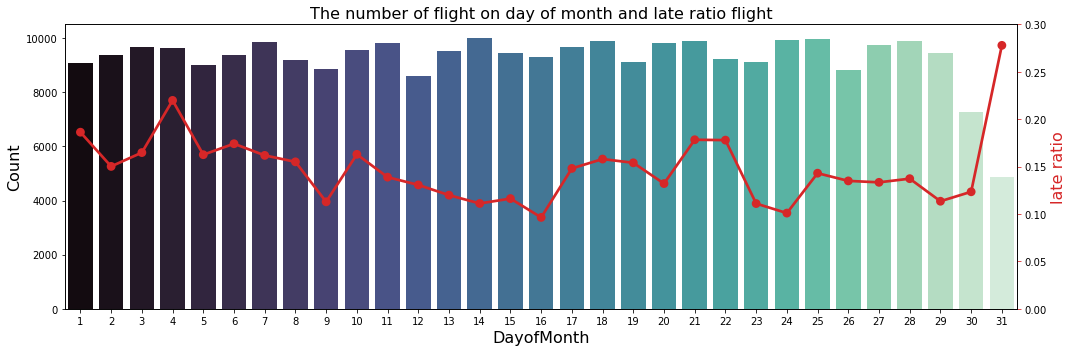

In [42]:
f, ax1 = plt.subplots(figsize = (15,5))
ax1.set_title('The number of flight on day of month and late ratio flight', fontsize = 16)
ax1.set_xlabel('Day of Month', fontsize = 16)
ax1.set_ylabel('Count', fontsize = 16)
ax1 = sns.barplot(x = 'DayofMonth', y = 'Count',data = dom, palette = 'mako')
ax1.tick_params(axis = 'y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Late ratio', fontsize = 16, color = color)
ax2 = sns.pointplot(x = 'DayofMonth', y = 'late ratio', data = dom, color = color)
ax2.set(ylim =(0, 0.3))
ax2.tick_params(axis = 'y', color = color)

f.tight_layout()
plt.show

The number of flight on day is normal distribution. However, the number of flight on month end is significantly reduced

The flight late ratio on day is a pretty big diffrence. Especially, the flight late ratio on date 31 is tallest

#### Day of week

In [43]:
dow = df1[['DayOfWeek', 'is_delay']].groupby('DayOfWeek').agg(['count', 'sum']).droplevel(axis = 1, level = 0).reset_index().rename(columns = {'sum': 'Sum', 'count': 'Count'})
dow['late ratio'] = dow['Sum']/dow['Count']

<function matplotlib.pyplot.show(close=None, block=None)>

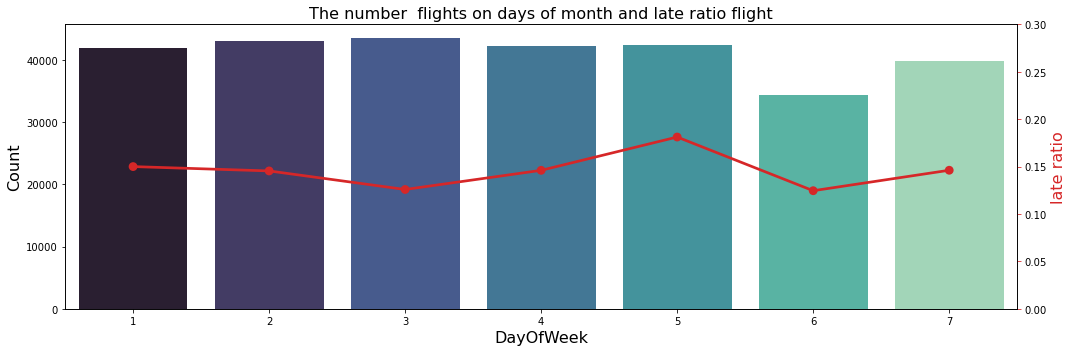

In [44]:
f, ax1 = plt.subplots(figsize = (15,5))
ax1.set_title('The number  flights on days of month and late ratio flight', fontsize = 16)
ax1.set_xlabel('Day of week', fontsize = 16)
ax1.set_ylabel('Count', fontsize = 16)
ax1 = sns.barplot(x = 'DayOfWeek', y = 'Count',data = dow, palette = 'mako')
ax1.tick_params(axis = 'y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Late ratio', fontsize = 16, color = color)
ax2 = sns.pointplot(x = 'DayOfWeek', y = 'late ratio', data = dow, color = color)
ax2.set(ylim =(0, 0.3))
ax2.tick_params(axis = 'y', color = color)

f.tight_layout()
plt.show

Based on graph, the flights in the dataset is normal distribution on weekday. The number of flight on saturday is least.

The flight late ratio on day of week is not much difference

#### Unique Carrier

In [45]:
uc = df1[['UniqueCarrier', 'is_delay']].groupby('UniqueCarrier').agg(['count', 'sum']).droplevel(axis = 1, level = 0).reset_index().rename(columns = {'sum': 'Sum', 'count': 'Count'})
uc['late ratio'] = uc['Sum']/uc['Count']

<function matplotlib.pyplot.show(close=None, block=None)>

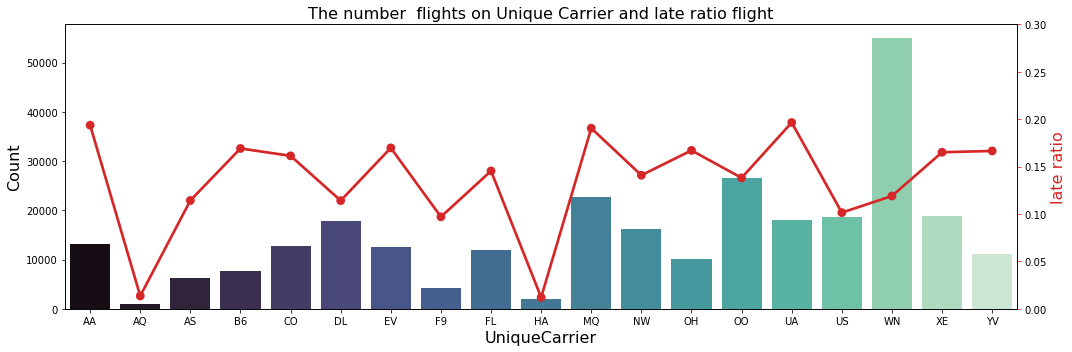

In [46]:
f, ax1 = plt.subplots(figsize = (15,5))
ax1.set_title('The number  flights on Unique Carrier and late ratio flight', fontsize = 16)
ax1.set_xlabel('Unique Carrier', fontsize = 16)
ax1.set_ylabel('Count', fontsize = 16)
ax1 = sns.barplot(x = 'UniqueCarrier', y = 'Count',data = uc, palette = 'mako')
ax1.tick_params(axis = 'y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Late ratio', fontsize = 16, color = color)
ax2 = sns.pointplot(x = 'UniqueCarrier', y = 'late ratio', data = uc, color = color)
ax2.set(ylim =(0, 0.3))
ax2.tick_params(axis = 'y', color = color)

f.tight_layout()
plt.show

The number of flight is uneven distribution among airline. 

<AxesSubplot:>

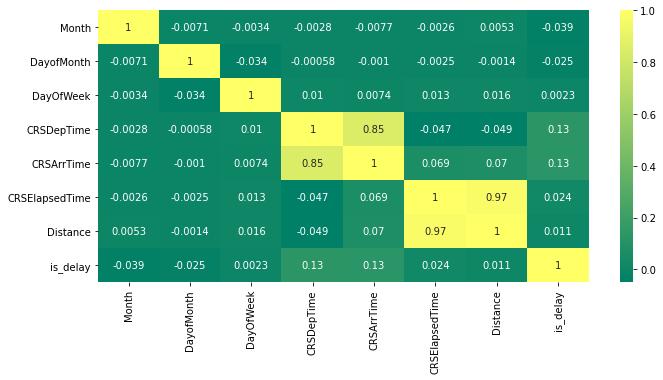

In [47]:
correlation = df1.corr()
plt.figure(figsize = (11,5))
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True, cmap = 'summer')

Correlation among Distance and CRSElapsedTime is 0.97. We are remove CRSElapsedTime

In [48]:
df = df1.drop(columns= ['CRSElapsedTime', 'aircraft_type','engine_type','CRSDepTime' ])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287124 entries, 0 to 322538
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          287124 non-null  int64 
 1   DayofMonth     287124 non-null  int64 
 2   DayOfWeek      287124 non-null  int64 
 3   CRSArrTime     287124 non-null  int64 
 4   UniqueCarrier  287124 non-null  object
 5   Origin         287124 non-null  object
 6   Dest           287124 non-null  object
 7   Distance       287124 non-null  int64 
 8   type           287124 non-null  object
 9   manufacturer   287124 non-null  object
 10  model          287124 non-null  object
 11  year           287124 non-null  object
 12  is_delay       287124 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 40.7+ MB


In [51]:
# apply onehotEncoder
data = pd.get_dummies(df, columns = ['year', 'Origin' ,'Dest', 'model', 'type',
                                            'manufacturer', 'UniqueCarrier'], drop_first = True)

# split train test
y = data['is_delay']
X = data.drop(columns = ['is_delay'])

#standardize data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
X_train.shape

(229699, 833)

In [53]:
#Naive Bayes
nb = GaussianNB()

#Logistic Regresion
lr = LogisticRegression()

#Dicision Tree
dt = DecisionTreeClassifier(criterion='entropy')

#Random Forest
rf = RandomForestClassifier()

#Gradient Boosting
gb = GradientBoostingClassifier(random_state = 1)

#SVM
svm = SVC()

### Apply the model for prediction with holdout

#### Naive Bayes

In [54]:
nb.fit(X_train, y_train)

y_prednb = nb.predict(X_test)

In [56]:
print(classification_report(y_test, y_prednb))

              precision    recall  f1-score   support

           0       0.91      0.07      0.14     48988
           1       0.15      0.95      0.26      8437

    accuracy                           0.20     57425
   macro avg       0.53      0.51      0.20     57425
weighted avg       0.79      0.20      0.16     57425



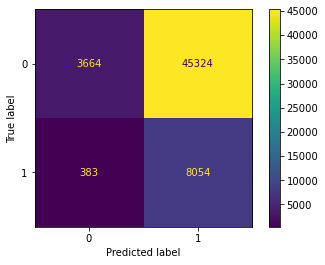

In [61]:
plot_confusion_matrix(nb, X_test, y_test)  
plt.show()

#### Logictic Regresion

In [57]:
lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)

print(classification_report(y_test, y_predlr))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     48988
           1       0.53      0.00      0.01      8437

    accuracy                           0.85     57425
   macro avg       0.69      0.50      0.47     57425
weighted avg       0.81      0.85      0.79     57425



D:\Software\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


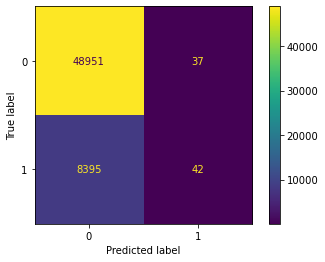

In [63]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

#### Decision Tree

In [58]:
dt.fit(X_train, y_train)
y_preddt = dt.predict(X_test)

print(classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     48988
           1       0.33      0.32      0.32      8437

    accuracy                           0.80     57425
   macro avg       0.60      0.60      0.60     57425
weighted avg       0.80      0.80      0.80     57425



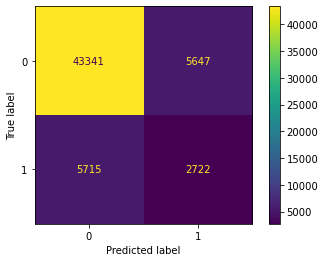

In [64]:
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()

#### Random Forest Classifier

In [59]:
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)

print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     48988
           1       0.53      0.06      0.12      8437

    accuracy                           0.85     57425
   macro avg       0.69      0.53      0.52     57425
weighted avg       0.81      0.85      0.80     57425



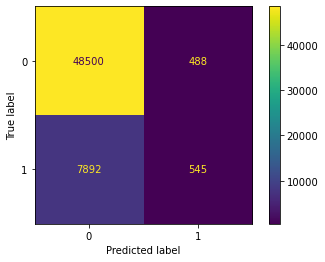

In [65]:
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

#### Support Vector Machine

In [ ]:
# svm.fit(X_trainohe, y_testohe)
# y_predsvm = svm.predict(X_testohe)

# print(classification_report(y_testohe, y_predsvm))

#### Gradient Boosting

In [66]:
gb.fit(X_train, y_train)
y_predgb = gb.predict(X_test)

print(classification_report(y_test, y_predgb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     48988
           1       0.69      0.01      0.02      8437

    accuracy                           0.85     57425
   macro avg       0.77      0.51      0.47     57425
weighted avg       0.83      0.85      0.79     57425



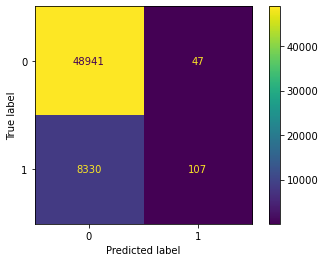

In [67]:
plot_confusion_matrix(gb, X_test, y_test)  
plt.show()

### Using PCA, apply the model for prediction with holdout

In [78]:
pca = PCA(n_components = 100)
pca.fit(X)
X_pca = pca.transform(X)

In [79]:
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(X_pca, y, test_size = 0.2)

#### Naive Bayes

In [80]:
nb.fit(X_trainpca, y_trainpca)
y_prednb = nb.predict(X_testpca)

print(classification_report(y_testpca, y_prednb))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     49099
           1       0.24      0.30      0.27      8326

    accuracy                           0.76     57425
   macro avg       0.56      0.57      0.56     57425
weighted avg       0.78      0.76      0.77     57425



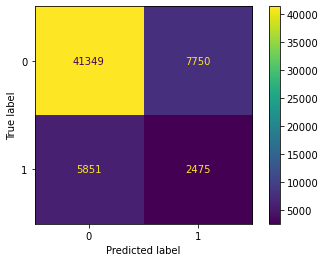

In [87]:
plot_confusion_matrix(nb, X_testpca, y_testpca)  
plt.show()

#### Logictic Regresion

In [82]:
lr.fit(X_trainpca, y_trainpca)
y_predlr = lr.predict(X_testpca)

print(classification_report(y_testpca, y_predlr))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     49099
           1       0.40      0.00      0.00      8326

    accuracy                           0.85     57425
   macro avg       0.63      0.50      0.46     57425
weighted avg       0.79      0.85      0.79     57425



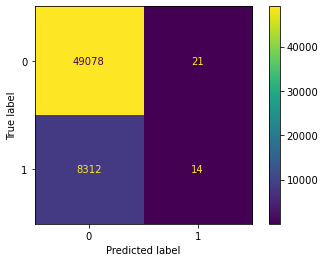

In [88]:
plot_confusion_matrix(lr, X_testpca, y_testpca)  
plt.show()

#### Dicision Tree

In [84]:
dt.fit(X_trainpca, y_trainpca)
y_preddt = dt.predict(X_testpca)

print(classification_report(y_testpca, y_preddt))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     49099
           1       0.24      0.25      0.25      8326

    accuracy                           0.77     57425
   macro avg       0.55      0.56      0.56     57425
weighted avg       0.78      0.77      0.78     57425



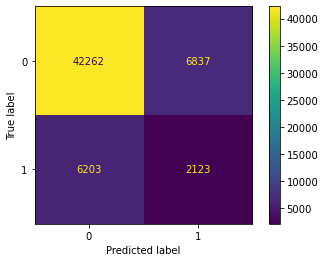

In [89]:
plot_confusion_matrix(dt, X_testpca, y_testpca)  
plt.show()

#### Random Forest Classifier

In [86]:
rf.fit(X_trainpca, y_trainpca)
y_predrf = rf.predict(X_testpca)

print(classification_report(y_testpca, y_predrf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     49099
           1       0.35      0.08      0.13      8326

    accuracy                           0.84     57425
   macro avg       0.60      0.53      0.52     57425
weighted avg       0.79      0.84      0.80     57425



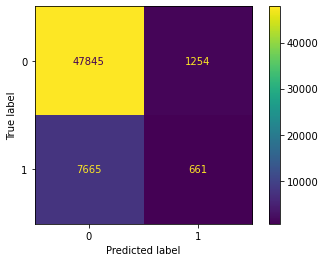

In [90]:
plot_confusion_matrix(rf, X_testpca, y_testpca)  
plt.show()

#### Support Vector Machine

In [ ]:
# svm.fit(X_trainpca, y_trainpca)
# y_predsvm = svm.predict(X_testpca)

# print(classification_report(y_testpca, y_predsvm))

#### Gradient Boosting

In [91]:
gb.fit(X_trainpca, y_trainpca)
y_predgb = gb.predict(X_testpca)

print(classification_report(y_testpca, y_predgb))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     49099
           1       0.62      0.00      0.01      8326

    accuracy                           0.86     57425
   macro avg       0.74      0.50      0.47     57425
weighted avg       0.82      0.86      0.79     57425



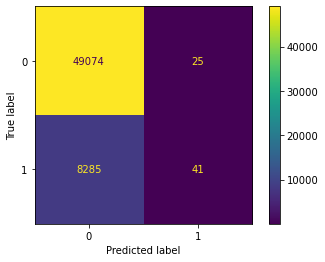

In [92]:
plot_confusion_matrix(gb, X_testpca, y_testpca)  
plt.show()

###  Using SelectKBest, apply the model for prediction with holdout

In [98]:
selector = SelectKBest(f_classif, k=5)
selector.fit(X,y)
X_SKB = selector.transform(X)

In [99]:
X_trainskb, X_testskb, y_trainskb, y_testskb = train_test_split(X_SKB, y, test_size = 0.2)

#### Naive Bayes

In [100]:
nb.fit(X_trainskb, y_trainskb)
y_prednb = nb.predict(X_testskb)

print(classification_report(y_testskb, y_prednb))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     49118
           1       0.25      0.20      0.23      8307

    accuracy                           0.80     57425
   macro avg       0.56      0.55      0.55     57425
weighted avg       0.78      0.80      0.79     57425



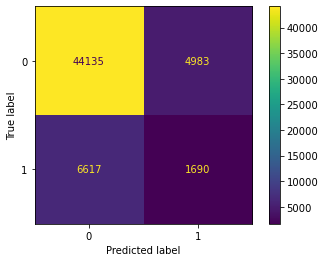

In [101]:
plot_confusion_matrix(nb, X_testskb, y_testskb)  
plt.show()

#### Logistic Regresion

In [102]:
lr.fit(X_trainskb, y_trainskb)
y_predlr = lr.predict(X_testskb)

print(classification_report(y_testskb, y_predlr))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     49118
           1       0.53      0.00      0.00      8307

    accuracy                           0.86     57425
   macro avg       0.69      0.50      0.46     57425
weighted avg       0.81      0.86      0.79     57425



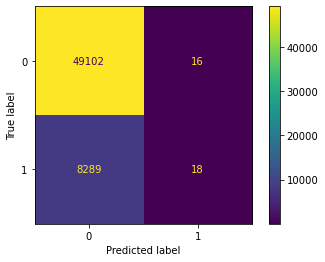

In [103]:
plot_confusion_matrix(lr, X_testskb, y_testskb)  
plt.show()

#### Dicision Tree

In [104]:
dt.fit(X_trainskb, y_trainskb)
y_preddt = dt.predict(X_testskb)

print(classification_report(y_testskb, y_preddt))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     49118
           1       0.35      0.02      0.04      8307

    accuracy                           0.85     57425
   macro avg       0.60      0.51      0.48     57425
weighted avg       0.78      0.85      0.79     57425



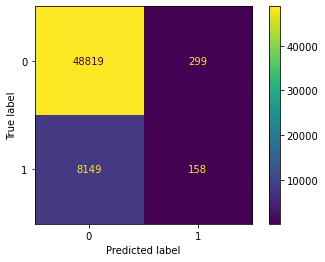

In [105]:
plot_confusion_matrix(dt, X_testskb, y_testskb)  
plt.show()

#### Random Forest Classifier

In [106]:
rf.fit(X_trainskb, y_trainskb)
y_predrf = rf.predict(X_testskb)

print(classification_report(y_testskb, y_predrf))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     49118
           1       0.34      0.02      0.04      8307

    accuracy                           0.85     57425
   macro avg       0.60      0.51      0.48     57425
weighted avg       0.78      0.85      0.79     57425



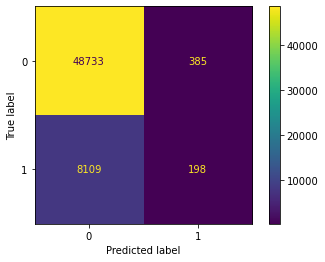

In [107]:
plot_confusion_matrix(rf, X_testskb, y_testskb)  
plt.show()

#### Support Vector Machine

In [ ]:
# svm.fit(X_trainskb, y_trainskb)
# y_predsvm = svm.predict(X_testskb)

# print(classification_report(y_testskb, y_predsvm))

#### Gradient Boosting

In [108]:
gb.fit(X_trainskb, y_trainskb)
y_predgb = gb.predict(X_testskb)

print(classification_report(y_testskb, y_predgb))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     49118
           1       0.27      0.00      0.00      8307

    accuracy                           0.86     57425
   macro avg       0.56      0.50      0.46     57425
weighted avg       0.77      0.86      0.79     57425



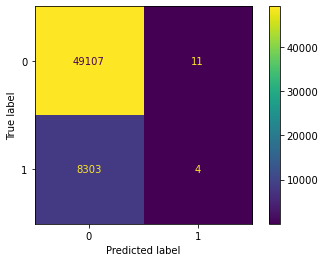

In [109]:
plot_confusion_matrix(gb, X_testskb, y_testskb)  
plt.show()

###  Using RFE, apply the model for prediction with holdout

In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
X_RFE = selector.transform(X)

In [ ]:
X_trainrfe, X_testrfe, y_trainrfe, y_testrfe = train_test_split(X_RFE, y, test_size = 0.2)

#### Naive Bayes

In [ ]:
nb.fit(X_trainrfe, y_trainrfe)
y_prednb = nb.predict(X_testrfe)

print(classification_report(y_testrfe, y_prednb))

In [ ]:
plot_confusion_matrix(nb, X_testrfe, y_testrfe)  
plt.show()

#### Logistic Regresion

In [ ]:
lr.fit(X_trainrfe, y_trainrfe)
y_predlr = lr.predict(X_testrfe)

print(classification_report(y_testrfe, y_predlr))

In [ ]:
plot_confusion_matrix(lr, X_testrfe, y_testrfe)  
plt.show()

#### Dicision Tree

In [ ]:
dt.fit(X_trainrfe, y_trainrfe)
y_preddt = dt.predict(X_testrfe)

print(classification_report(y_testrfe, y_preddt))

In [ ]:
plot_confusion_matrix(dt, X_testrfe, y_testrfe)  
plt.show()

#### Random Forest Classifier

In [ ]:
rf.fit(X_trainrfe, y_trainrfe)
y_predrf = rf.predict(X_testrfe)

print(classification_report(y_testrfe, y_predrf))

In [ ]:
plot_confusion_matrix(rf, X_testrfe, y_testrfe)  
plt.show()

#### Support Vector Machine

In [ ]:
# svm.fit(X_trainrfe, y_trainrfe)
# y_predsvm = svm.predict(X_testrfe)

# print(classification_report(y_testrfe, y_predsvm))

#### Gradient Boosting

In [ ]:
gb.fit(X_trainrfe, y_trainrfe)
y_predgb = gb.predict(X_testrfe)

print(classification_report(y_testrfe, y_predgb))

In [ ]:
plot_confusion_matrix(gb, X_testrfe, y_testrfe)  
plt.show()

###  Using GridSearchCV, apply the model for prediction with holdout

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0,2)

#### Naive Bayes

In [ ]:
grid = GridSearchCV(nb, param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

y_prednb = grid.predict(X_test)

print(classification_report(y_test, y_prednb))

#### Dicision Tree

In [ ]:
grid = GridSearchCV(dt, param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

y_preddt = grid.predict(X_test)

print(classification_report(y_test, y_preddt))

#### Random Forest Classifier

In [ ]:
grid = GridSearchCV(rf, param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

y_predrf = grid.predict(X_test)

print(classification_report(y_test, y_predrf))

#### Logistic Regresion

In [ ]:
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

y_predlr = grid.predict(X_test)

print(classification_report(y_test, y_predlr))

#### Support Vector Machine

In [ ]:
# grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
# grid.fit(X_train,y_train)

# y_predsvm = grid.predict(X_test)

# print(classification_report(y_test, y_predsvm))

#### Gradient Boosting

In [ ]:
grid = GridSearchCV(gb, param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

y_predgb = grid.predict(X_test)

print(classification_report(y_test, y_predgb))